In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import GPy
%matplotlib inline

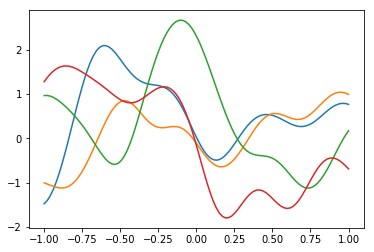

In [106]:
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.2)

N_sim = 100
x_sim = np.linspace(-1, 1, N_sim)
x_sim = x_sim[:, None]    #入力変数を1列に変更する　or　x_sim.reshape(-1,1)
mu = np.zeros(N_sim)
cov = kernel.K(x_sim, x_sim)       #.Kで共分散行列か？
y_sim = np.random.multivariate_normal(mu, cov, size=4)   #sizeでランダムに生成する正規分布の数を指定, 1行目に一つ目のデータ、二行目に二つ目のデータ
                                       #100次元の正規分布からランダムに１つサンプルする
for i  in range(4):
    plt.plot(x_sim, y_sim[i])


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


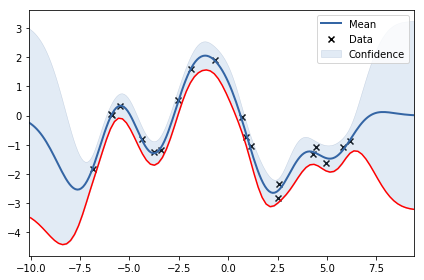

In [107]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(1)
# kernel = GPy.kern.RBF(1) + GPy.kern.Bias(1) + GPy.kern.Linear(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
model = GPy.models.GPRegression(d.X[:, None], d.Y[:, None], kernel=kernel)
model.optimize()
model.plot()

## prediction
x_pred = np.linspace(-10, 10, 100)
x_pred = x_pred[:, None]
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]

plt.plot(x_pred, y_qua_pred,color='red')

 /anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning:Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-6.836950999999999, right=-6.836950999999999


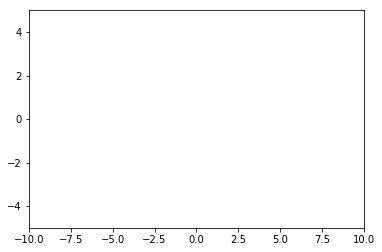

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


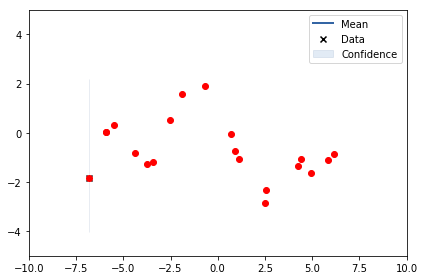

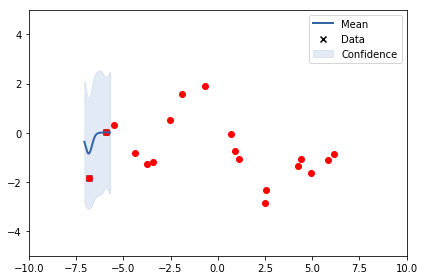

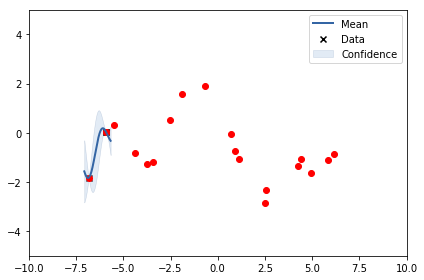

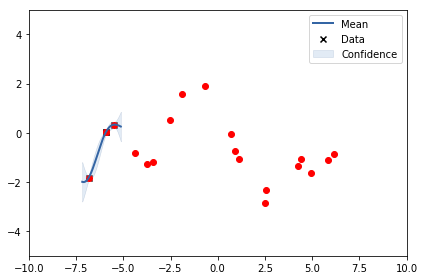

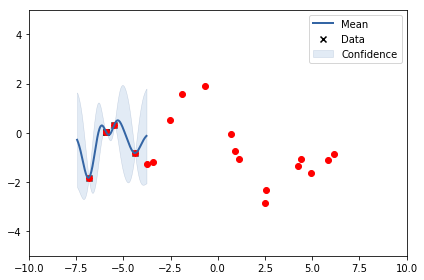

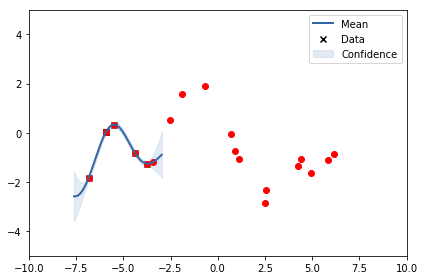

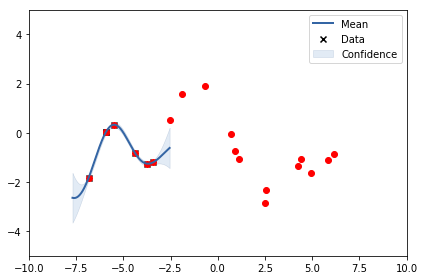

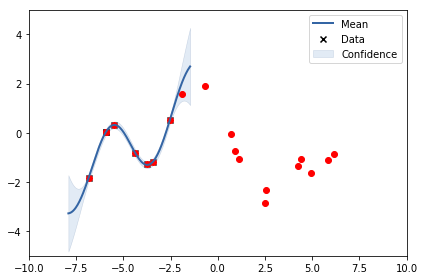

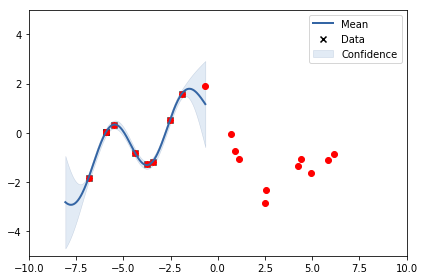

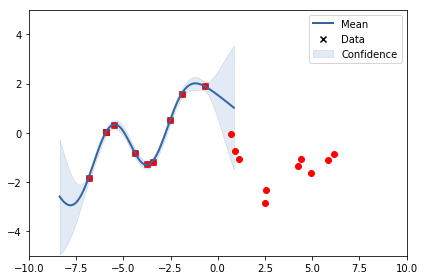

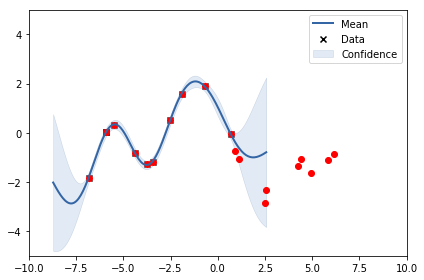

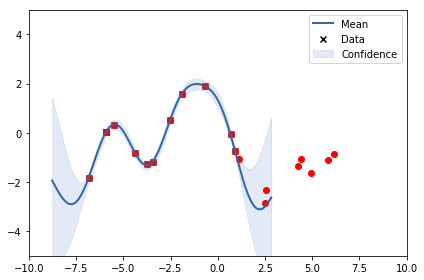

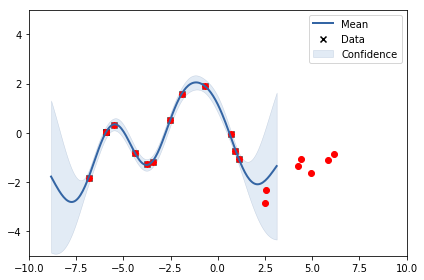

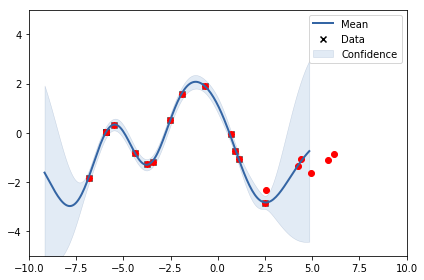

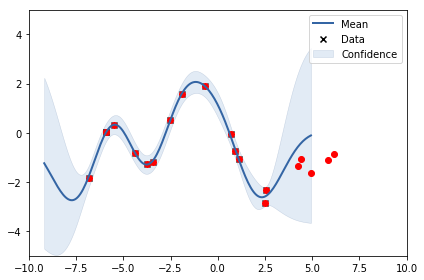

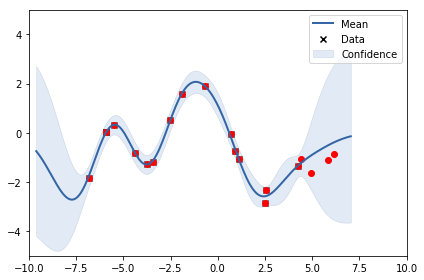

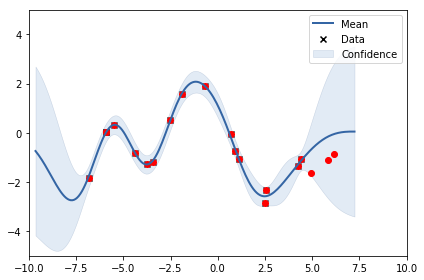

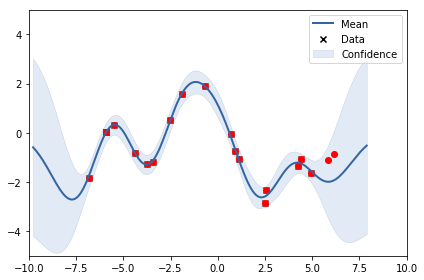

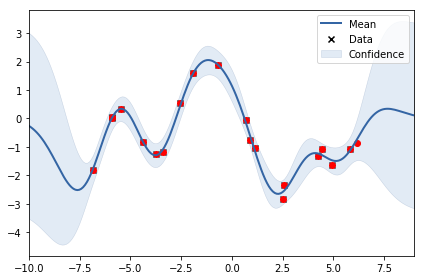

In [154]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(1)
# kernel = GPy.kern.RBF(1) + GPy.kern.Bias(1) + GPy.kern.Linear(1)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-GPbook-Fig2_05.txt')
d_2 = d.copy()
for i in range(1,len(d.X[:, None])):
    plt.xlim(-10, 10)
    plt.ylim(-5, 5)
    model = GPy.models.GPRegression(d.X[:, None][:i], d.Y[:, None][:i], kernel=kernel)
    model.optimize()
    model.plot()
    plt.scatter(d_2['X'], d_2['Y'], marker='o', color='red')
    
    



 /anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'
 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


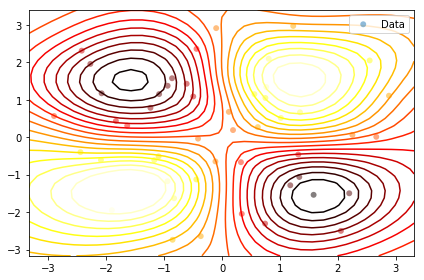

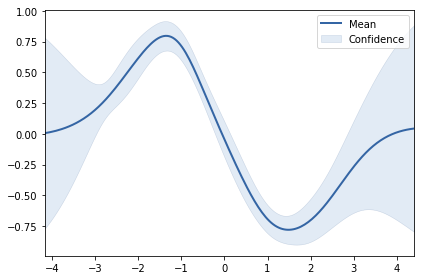

In [166]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

kernel = GPy.kern.Matern52(2, ARD=True)

np.random.seed(seed=123)
N = 50
X = np.random.uniform(-3.,3.,(N, 2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2]) + np.random.randn(N,1)*0.05

model = GPy.models.GPRegression(X, Y, kernel)
model.optimize(messages=True, max_iters=1e5)
model.plot()


model.plot(fixed_inputs=[(0, -1.0)], plot_data=False)


## prediction
x_pred = np.array([np.linspace(-3, 3, 100), np.linspace(3, -3, 100)]).T
y_qua_pred = model.predict_quantiles(x_pred, quantiles=(2.5, 50, 97.5))[0]


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


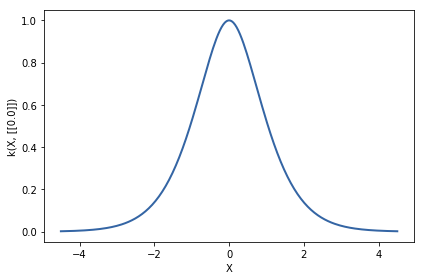

In [176]:
kernel = GPy.kern.Matern52(1, ARD=False)
kernel.plot()

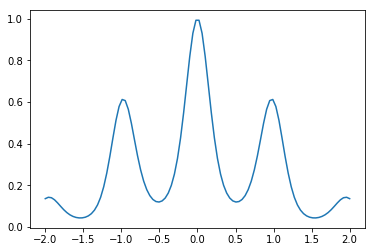

In [233]:
from sklearn.gaussian_process import kernels as sk_kern

kern = sk_kern.RBF(length_scale=.5)
kern = sk_kern.ExpSineSquared() * sk_kern.RBF()

# ほかにも色々と種類はある。ドキュメント参照
# kern = sk_kern.RationalQuadratic(length_scale=.5)
# kern = sk_kern.ConstantKernel()
# kern = sk_kern.WhiteKernel(noise_level=3.)

# 可視化は定義されていないので自分で用意する必要あり
X = np.linspace(-2, 2, 100)
plt.plot(X, kern(X.reshape(-1, 1), np.array([[0]])))

In [209]:
X.reshape(-1, 1).shape

(100, 1)

In [210]:
np.array([[0.]]).shape

(1, 1)

In [214]:
np.array([[0.]])

array([[0.]])

In [227]:
A = kern(X.reshape(-1, 1), np.zeros([100,1]))

In [223]:
X.shape

(100,)

NameError: name 'df' is not defined